Epsilon: 0.0125, Optimal max_leaf_nodes: 20, Minimum Test MSE: 0.00024
Epsilon: 0.0250, Optimal max_leaf_nodes: 11, Minimum Test MSE: 0.00075
Epsilon: 0.0500, Optimal max_leaf_nodes: 10, Minimum Test MSE: 0.00287
Epsilon: 0.0625, Optimal max_leaf_nodes: 8, Minimum Test MSE: 0.00420
Epsilon: 0.0750, Optimal max_leaf_nodes: 8, Minimum Test MSE: 0.00681


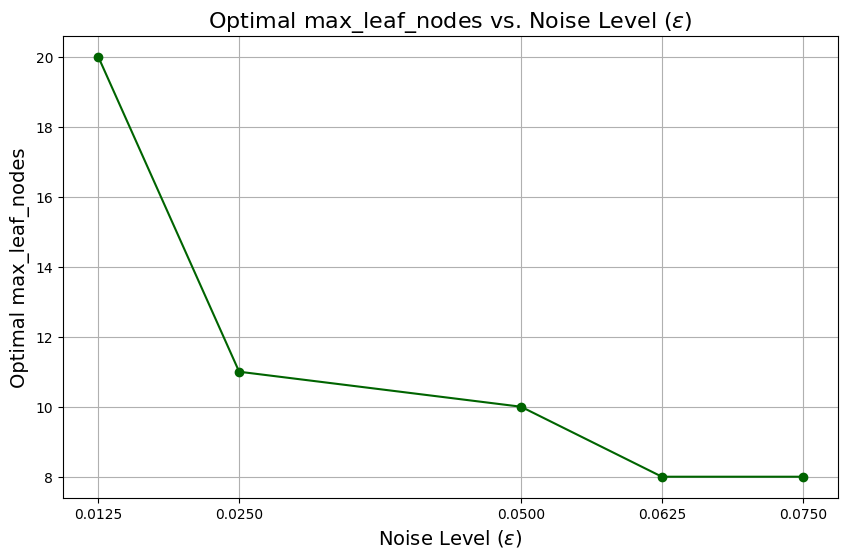

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# 1. Modify the generateData function to accept epsilon
def generateData(nsamp, epsilon):
    """Generates a synthetic dataset with a quadratic target and Gaussian noise."""
    X = np.random.rand(nsamp, 1) - 0.5  # A single random input feature
    y = X ** 2 + epsilon * np.random.randn(nsamp, 1) # Added epsilon parameter
    return X, y

# Set the number of samples for training and testing
n_samp_train = 200
n_samp_test = 1000

# Define the noise levels (epsilon) to test
epsilons = [0.0125, 0.025, 0.05, 0.0625, 0.075]

# Store the optimal max_leaf_nodes for each epsilon
optimal_max_leaf_nodes = []

# 2. Loop through different epsilon values
for epsilon in epsilons:
    # Generate new training and test data for each epsilon
    X_train, y_train = generateData(n_samp_train, epsilon)
    X_test, y_test = generateData(n_samp_test, epsilon)

    # Store test errors for different max_leaf_nodes
    test_errors = []
    
    # 3. Vary max_leaf_nodes from 2 to 20
    for max_leaf_nodes in range(2, 21):
        # Create and train the DecisionTreeRegressor
        tree_reg = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=42)
        tree_reg.fit(X_train, y_train)
        
        # Make predictions on the test set and calculate the MSE
        y_pred_test = tree_reg.predict(X_test)
        mse_test = mean_squared_error(y_test, y_pred_test)
        test_errors.append(mse_test)

    # 4. Find the optimal max_leaf_nodes with the minimum test error
    min_error = min(test_errors)
    optimal_mln = range(2, 21)[test_errors.index(min_error)]
    optimal_max_leaf_nodes.append(optimal_mln)
    
    # Print the results for each epsilon
    print(f"Epsilon: {epsilon:.4f}, Optimal max_leaf_nodes: {optimal_mln}, Minimum Test MSE: {min_error:.5f}")

# 5. Plot the optimal max_leaf_nodes versus epsilon
plt.figure(figsize=(10, 6))
plt.plot(epsilons, optimal_max_leaf_nodes, 'o-', color='darkgreen')
plt.title('Optimal max_leaf_nodes vs. Noise Level ($\epsilon$)', fontsize=16)
plt.xlabel('Noise Level ($\epsilon$)', fontsize=14)
plt.ylabel('Optimal max_leaf_nodes', fontsize=14)
plt.grid(True)
plt.xticks(epsilons)
plt.show()